The most fundamental question we can ask about a robot is, "Where is it?"
The answer to this question is the robot's Configuration.

The Configuration is a vector of numbers that fully describes the position of the robot.

Robots are composed of rigid links connected by joints. The joints can be actuated by motors to change the configuration of the robot.

![Example of links and joints](Joints-and-Links-of-Robot.png)

The configuration space of a robot is the set of all possible configurations of the robot. Configuration space is also known as C-space, or C<sub>space</sub>.

The dimension of the configuration space is the number of degrees of freedom of the robot (DOF). In other words the number of independent parameters required to fully specify the configuration of the robot.

For example, a robot with 2 revolute joints has a configuration space of 2 dimensions which can described by the angles of the 2 joints.

We can visualize the angle of joint 2 as a point in a circle and the angle of joint 1 as a point on another circle.

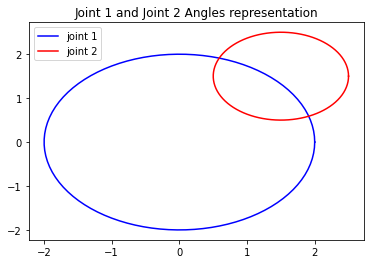

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# joint 1
r1 = 2
x1 = 0
y1 = 0

# joint 2
r2 = 1
x2 = 1.5
y2 = 1.5


# plot joint 1 possible angles
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
plt.plot(x, y, 'b')

# plot joint 2 possible angles around a point in joint 1
theta = np.linspace(0, 2*np.pi, 100)
x = r2*np.cos(theta) + x2
y = r2*np.sin(theta) + y2
plt.plot(x, y, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('Joint 1 and Joint 2 Angles representation')
plt.show()


To visualize the full c-space, lets rotate the circle of joint 1 to be perpendicular to the circle of joint 2.

At each angle of joint 1, we can draw the circle of joint 2, we can repeat this for each angle of joint 1.

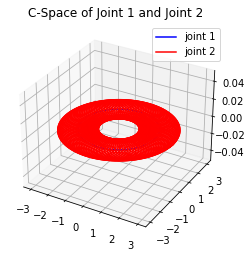

In [15]:
# plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot circle 1
theta = np.linspace(0, 2*np.pi, 100)
x = r1*np.cos(theta) + x1
y = r1*np.sin(theta) + y1
z = np.zeros(100)
ax.plot(x, y, z, 'b')

# at each point of joint 1, plot a circle of joint 2
for xi, yi, zi in zip(x, y, z):
    theta = np.linspace(0, 2*np.pi, 100)
    x = r2*np.cos(theta) + xi
    y = r2*np.sin(theta) + yi
    z = np.ones(100)*zi
    ax.plot(x, y, z, 'r')

plt.legend(['joint 1', 'joint 2'])
plt.title('C-Space of Joint 1 and Joint 2')
plt.show()
